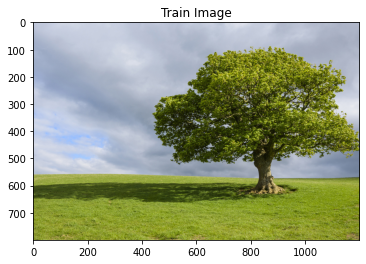

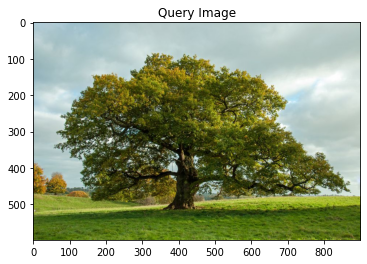

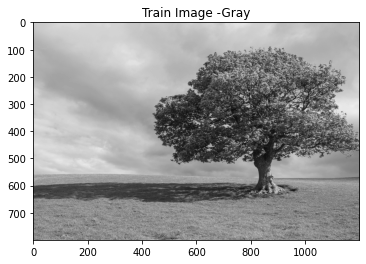

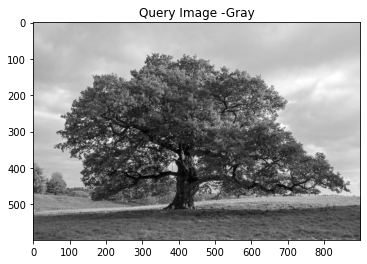

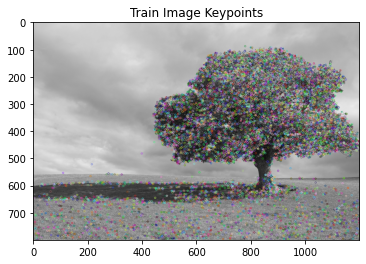

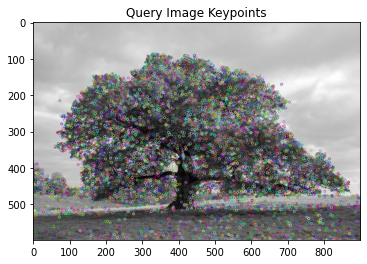

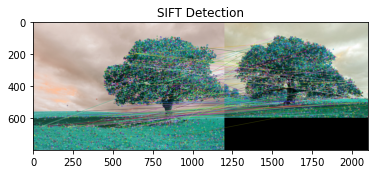

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



train_img = cv2.imread('Tree1.jpeg')

query_img = cv2.imread('Tree2.jpeg')


# Show Images 
plt.figure(1)
plt.imshow(cv2.cvtColor(train_img, cv2.CV_32S))
plt.title('Train Image')

plt.figure(2)
plt.imshow(cv2.cvtColor(query_img, cv2.CV_32S))
plt.title('Query Image')



# Turn Images to grayscale

def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

train_img_gray = to_gray(train_img)
query_img_gray = to_gray(query_img)

plt.figure(3)
plt.imshow(train_img_gray, cmap='gray')
plt.title('Train Image -Gray')


plt.figure(4)
plt.imshow(query_img_gray, cmap= 'gray')
plt.title('Query Image -Gray')


# Initialise SIFT detector
# sift = cv2.xfeatures2d.SIFT_create()
    
sift = cv2.SIFT_create()
# kp = sift.detect(gimg,None)
# img=cv2.drawKeypoints(gimg,kp,img)

# Generate SIFT keypoints and descriptors
train_kp, train_desc = sift.detectAndCompute(train_img_gray, None)
query_kp, query_desc = sift.detectAndCompute(query_img_gray, None)

plt.figure(5)
plt.imshow((cv2.drawKeypoints(train_img_gray, train_kp, train_img.copy())))
plt.title('Train Image Keypoints')

plt.figure(6)
plt.imshow((cv2.drawKeypoints(query_img_gray, query_kp, query_img.copy())))
plt.title('Query Image Keypoints')


# create a BFMatcher object which will match up the SIFT features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(train_desc, query_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    train_img, train_kp,
    query_img, query_kp,
    matches[:N_MATCHES], query_img.copy(), flags=0)

plt.figure(7)
plt.imshow(match_img)
plt.title('SIFT Detection')
plt.show()